In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
#ARIMA
from pandas.plotting import autocorrelation_plot

In [3]:
day_wise_revenue=pd.read_csv('day_wise_revenue.csv')
day_wise_revenue

,shop_date,daily_revenue
0,10-04-2006,285415
1,11-04-2006,286707
2,12-04-2006,286160
3,13-04-2006,286313
4,14-04-2006,286160
...,...,...
814,02-07-2008,307646
815,03-07-2008,307893
816,04-07-2008,312727
817,05-07-2008,307788


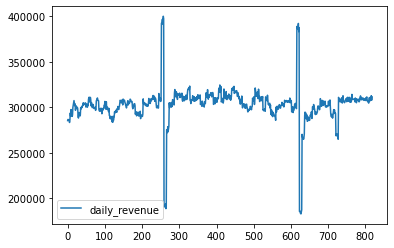

In [4]:
day_wise_revenue.plot()

In [5]:
dataset = day_wise_revenue['daily_revenue'].values
dataset = dataset.astype('float32')

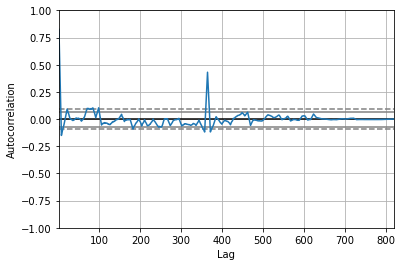

In [7]:
autocorrelation_plot(day_wise_revenue['daily_revenue'])

In [8]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(day_wise_revenue['daily_revenue'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.daily_revenue   No. Observations:                  818
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8873.768
Method:                       css-mle   S.D. of innovations          12446.421
Date:                Fri, 08 May 2020   AIC                          17761.537
Time:                        16:18:35   BIC                          17794.485
Sample:                             1   HQIC                         17774.181
                                                                              
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    31.8117    419.439      0.076      0.940    -790.274     853.898
ar.L1.D.daily_revenue    -0.0317      0.035     -0.908      0.364      -0.100       0.037
ar.L2.D.

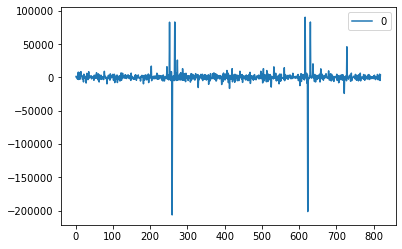

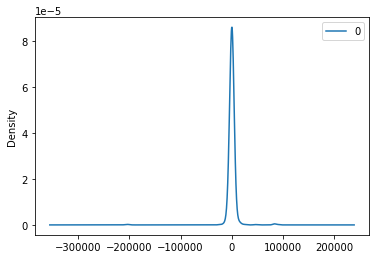

                   0
count     818.000000
mean       -0.132661
std     12454.036392
min   -206541.848651
25%     -1988.058952
50%       -30.491954
75%      2192.373405
max     90085.724248


In [10]:
# plot residual errors
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
X = day_wise_revenue['daily_revenue'].values

In [13]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
confidence=list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output, error, conf = model_fit.forecast()
	yhat = output[0]
	predictions.append([yhat, conf[0][0], conf[0][1]])
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f,' % (yhat, obs))

predicted=303723.411493, expected=303072.000000,
predicted=303080.198312, expected=302290.000000,
predicted=302397.471698, expected=303874.000000,
predicted=303890.139149, expected=304455.000000,
predicted=304306.852521, expected=299251.000000,
predicted=299436.621693, expected=302609.000000,
predicted=302727.383305, expected=292701.000000,
predicted=292741.704990, expected=292011.000000,
predicted=292582.431456, expected=297078.000000,
predicted=296597.382496, expected=290885.000000,
predicted=291074.439868, expected=295187.000000,
predicted=295275.959498, expected=289772.000000,
predicted=289513.967254, expected=294498.000000,
predicted=294889.314881, expected=293390.000000,
predicted=292939.166059, expected=292741.000000,
predicted=293101.924434, expected=291561.000000,
predicted=291420.668606, expected=290815.000000,
predicted=290982.360954, expected=289803.000000,
predicted=289826.107920, expected=289182.000000,
predicted=289230.873075, expected=285729.000000,
predicted=285811.738

predicted=289542.577137, expected=292354.000000,


c:\users\sreshta\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=292313.924778, expected=291626.000000,
predicted=291638.923398, expected=288142.000000,
predicted=288263.955405, expected=291528.000000,
predicted=291452.726482, expected=295167.000000,
predicted=295044.792099, expected=297481.000000,
predicted=297442.473344, expected=293199.000000,
predicted=293315.357181, expected=297266.000000,
predicted=297199.671336, expected=293769.000000,
predicted=293819.198564, expected=294234.000000,
predicted=294293.421940, expected=293019.000000,
predicted=293027.838284, expected=268846.000000,
predicted=269506.638896, expected=270538.000000,
predicted=270619.375629, expected=269009.000000,
predicted=268885.196929, expected=270499.000000,
predicted=270564.160918, expected=268531.000000,
predicted=268515.656657, expected=270220.000000,
predicted=270179.603459, expected=264993.000000,
predicted=265079.962374, expected=310923.000000,
predicted=309654.356774, expected=309304.000000,
predicted=309098.241667, expected=309050.000000,
predicted=309328.015

In [15]:
pred=pd.DataFrame(predictions)

In [16]:
pred[2]

0      325247.072594
1      324583.991308
2      323881.483967
3      325354.681558
4      325751.673648
           ...      
274    332937.307629
275    332114.641345
276    332376.992462
277    337018.150478
278    332357.549717
Name: 2, Length: 279, dtype: float64

In [18]:
rmse = np.sqrt(mean_squared_error(test, pred[0]))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 14900.480


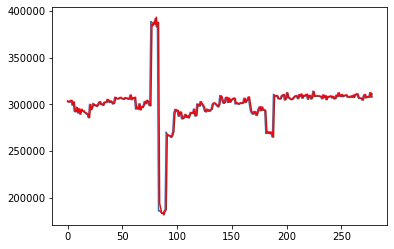

In [34]:
from matplotlib import pyplot
#pyplot.plot(train)
pyplot.plot(test)
pyplot.plot(pred[0], color='red')
pyplot.show()

In [21]:
x_data=pd.DataFrame(day_wise_revenue['daily_revenue'])
x_data

,daily_revenue
0,285415
1,286707
2,286160
3,286313
4,286160
...,...
814,307646
815,307893
816,312727
817,307788


In [22]:
test1=test.reshape(-1, 1)
test1=pd.DataFrame(test1)

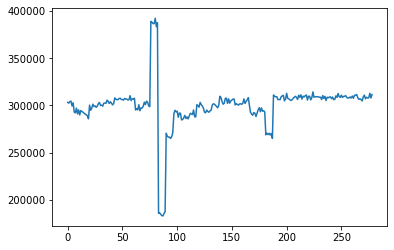

In [36]:
pyplot.plot(test1)
pyplot.show()

In [23]:
predictions1=pd.DataFrame(pred[0])

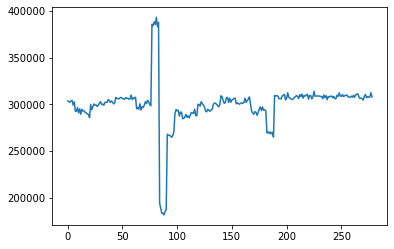

In [37]:
pyplot.plot(predictions1)
pyplot.show()

In [24]:
low=pd.DataFrame(pred[1])

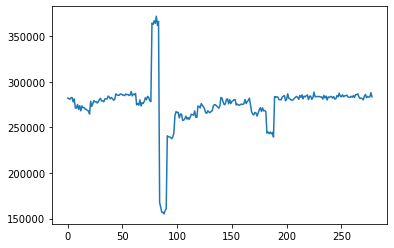

In [38]:
pyplot.plot(low)
pyplot.show()

In [25]:
up=pd.DataFrame(pred[2])

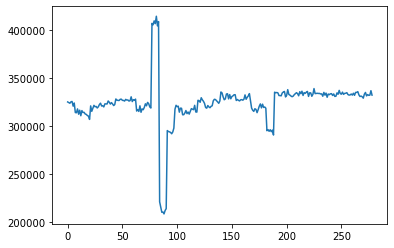

In [39]:
pyplot.plot(up)
pyplot.show()

In [26]:
train1=pd.DataFrame(train)

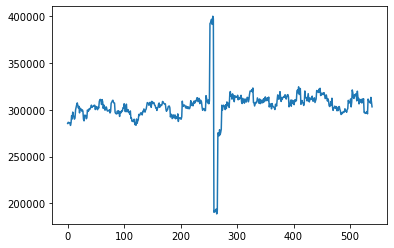

In [40]:
pyplot.plot(train1)
pyplot.show()

In [45]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(x_data)
trainPredictPlot[:, :] = np.nan
#trainPredictPlot[0:len(train), :] = train1

In [47]:
trainPredictPlot[:, :] = np.nan
trainPredictPlot

array([[-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [

In [50]:
testPredictPlot = np.empty_like(x_data)
testPredictPlot[:, :] = np.nan
#testPredictPlot[len(train1):len(x_data), :] = predictions1

In [51]:
testPredictPlot

array([[-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [-9223372036854775808],
       [

In [53]:
hello[:,:]

nan

In [29]:
lower = np.empty_like(x_data)
lower[:, :] = np.nan
lower[len(train1):len(x_data), :] = low

In [30]:
upper = np.empty_like(x_data)
upper[:, :] = np.nan
upper[len(train1):len(x_data), :] = up

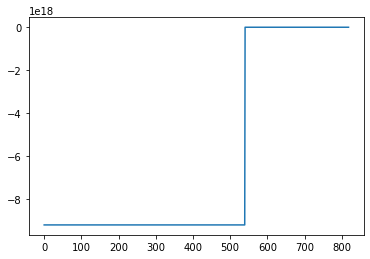

In [33]:
plt.plot(upper)

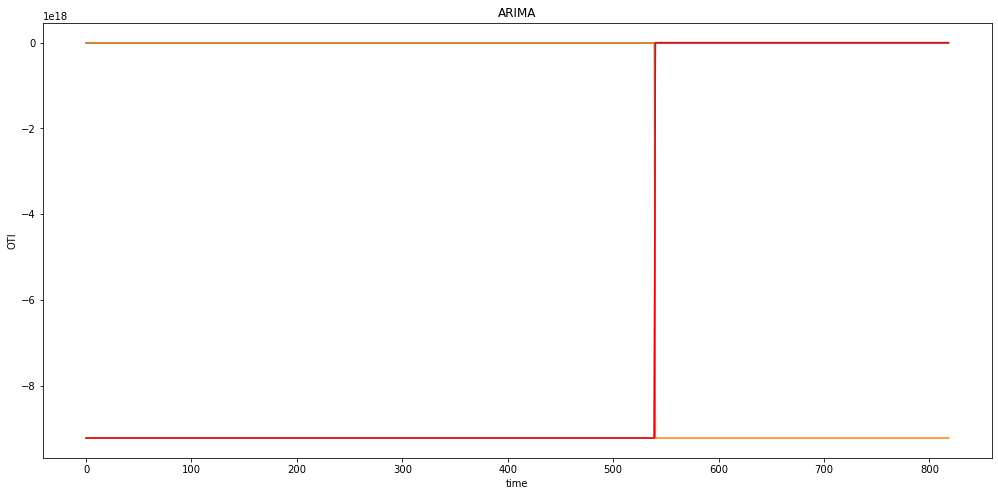

In [31]:
plt.figure(figsize=(17,8))
plt.plot(x_data, label="original")
plt.title("ARIMA")
plt.xlabel("time")
plt.ylabel("OTI")
plt.plot(trainPredictPlot)
plt.plot(upper, color="Grey")
plt.plot(lower, color="Grey")
plt.plot(testPredictPlot, color='Red')
plt.show()
#BLue is original
#Orange is training
#Red is Predicted